In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
data = pd.read_csv('/content/sample_data/train.csv')

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

In [7]:
print(X)
X.shape

      battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0               842     0          2.2  ...        0             0     1
1              1021     1          0.5  ...        1             1     0
2               563     1          0.5  ...        1             1     0
3               615     1          2.5  ...        1             0     0
4              1821     1          1.2  ...        1             1     0
...             ...   ...          ...  ...      ...           ...   ...
1995            794     1          0.5  ...        1             1     0
1996           1965     1          2.6  ...        1             1     1
1997           1911     0          0.9  ...        1             1     0
1998           1512     0          0.9  ...        1             1     1
1999            510     1          2.0  ...        1             1     1

[2000 rows x 20 columns]


(2000, 20)

In [8]:
print(y)
print(y.shape)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64
(2000,)


Apply select k best features , pick top 10 features

In [9]:
best_features = SelectKBest(score_func=chi2,k = 10)

In [10]:
fit = best_features.fit(X,y)

In [11]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
datascores = pd.DataFrame(fit.scores_)

In [13]:
dfcolumns = pd.DataFrame(X.columns)

In [14]:
print(datascores)

                0
0    14129.866576
1        0.723232
2        0.648366
3        0.631011
4       10.135166
5        1.521572
6       89.839124
7        0.745820
8       95.972863
9        9.097556
10       9.186054
11   17363.569536
12    9810.586750
13  931267.519053
14       9.614878
15      16.480319
16      13.236400
17       0.327643
18       1.928429
19       0.422091


In [15]:
print(dfcolumns)

                0
0   battery_power
1            blue
2     clock_speed
3        dual_sim
4              fc
5          four_g
6      int_memory
7           m_dep
8       mobile_wt
9         n_cores
10             pc
11      px_height
12       px_width
13            ram
14           sc_h
15           sc_w
16      talk_time
17        three_g
18   touch_screen
19           wifi


In [16]:
Feature_scores = pd.concat([dfcolumns,datascores],axis = 1)

In [17]:
Feature_scores

,0,0
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [18]:
Feature_scores.columns = ['Features','Scores']

In [19]:
Feature_scores

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
Feature_scores.sort_values(by='Scores',ascending=False)

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


Feature Importance

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [22]:
model = RandomForestClassifier()


In [23]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
model.feature_importances_

array([0.07472178, 0.00602923, 0.0274981 , 0.00620919, 0.02547443,
       0.00646929, 0.03548076, 0.02414661, 0.03838657, 0.02246417,
       0.02859956, 0.05623408, 0.05577166, 0.49052818, 0.02755737,
       0.02712518, 0.0286776 , 0.0053646 , 0.00675583, 0.00650579])

In [25]:
#jo 0.50 contribute kar raha hai , wo most imp feature hai

In [27]:
feature_importance = pd.DataFrame(model.feature_importances_,index = X.columns,columns = ['Importance'])

In [30]:
feature_importance = feature_importance.sort_values(by="Importance",ascending=False)

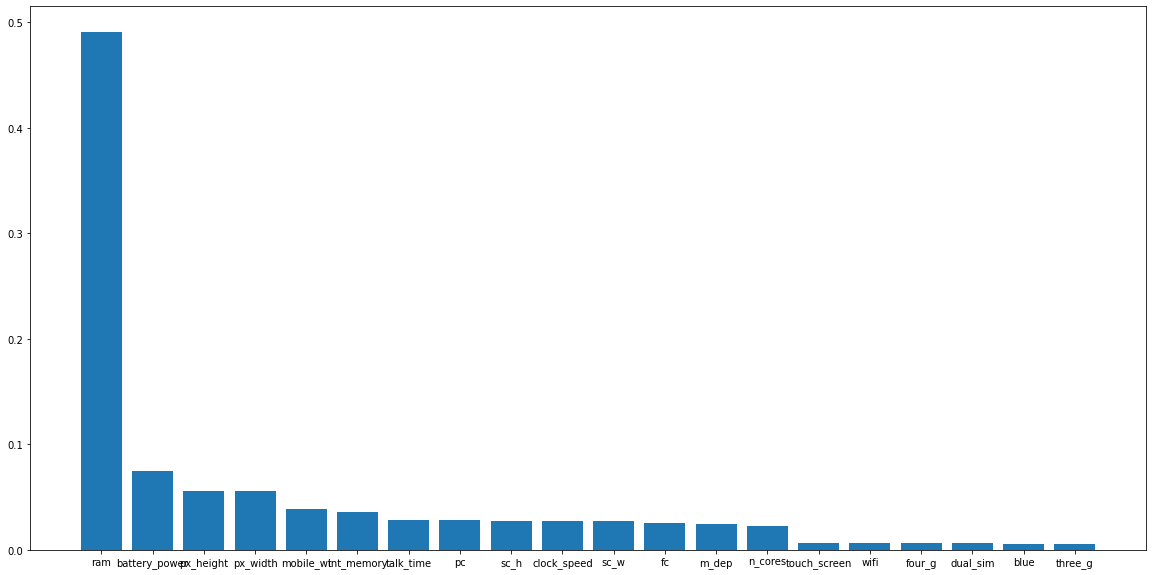

In [34]:
plt.figure(figsize=(20,10))
plt.bar(feature_importance.index,feature_importance['Importance'])
plt.show() 

Correlation matrix

In [35]:
data_Corr = data.corr()

In [36]:
data_Corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [37]:
import seaborn as sns

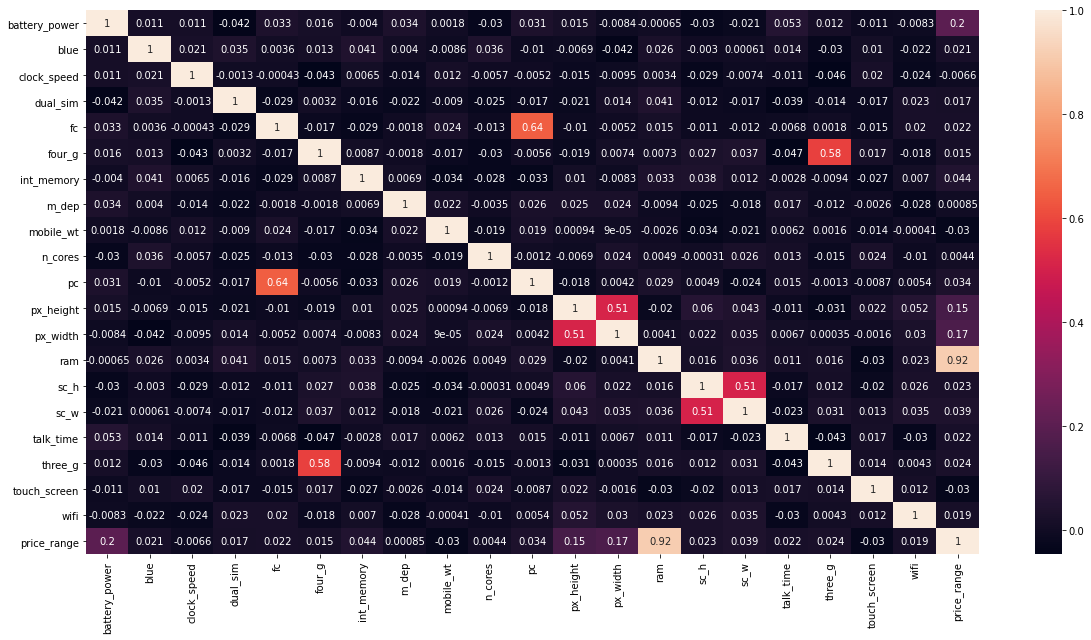

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(data_Corr,annot=True)
plt.show()

Check the model performance

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [40]:
rfc = RandomForestClassifier()

In [42]:
new_Scores = cross_val_score(rfc,X,y,cv=10)

In [43]:
new_Scores.mean()

0.8825000000000001

Now how to get the best 10 features?

In [46]:
ten_best_features = Feature_scores.sort_values(by='Scores',ascending=False).head(10)['Features'].values
print(ten_best_features)

['ram' 'px_height' 'battery_power' 'px_width' 'mobile_wt' 'int_memory'
 'sc_w' 'talk_time' 'fc' 'sc_h']


In [47]:
X[ten_best_features]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [49]:
new_output = cross_val_score(rfc,X[ten_best_features],y,cv=10)

In [50]:
new_output

array([0.89 , 0.9  , 0.94 , 0.925, 0.925, 0.895, 0.89 , 0.905, 0.9  ,
       0.875])

In [51]:
new_output.mean()

0.9045